<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


---
## 01. First Neural Network with PyTorch


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will implement a simple neural network to represent a linear model using `PyTorch`.

---

In [1]:
import torch
from torch import nn
import torch.optim as optim

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

torch.manual_seed(413)

## The Dataset

We will use a random dataset including 100 temperatures given in Celsius and Fahrenheit degrees.

In [2]:
def C2F(c_deg):
  return (9/5)*c_deg + 32

celsius = np.random.rand(100)*100-50
fahrenheit = C2F(celsius)


In [3]:
# It is possible to transform the numpy arrays into torch tensors with either
# of these commands. Note that the tensors are column vectors of
# the float32 type.

Ctensor = torch.tensor(celsius, dtype=torch.float32).reshape(-1,1)
Ftensor = torch.tensor(fahrenheit, dtype=torch.float32).reshape(-1,1)

Ctensor[:10], Ftensor[:10]

(tensor([[-24.4108],
         [-43.3100],
         [ 42.5065],
         [ -8.9440],
         [-47.7042],
         [-28.9972],
         [-39.6220],
         [-44.6742],
         [-37.9666],
         [ 11.0891]]),
 tensor([[-11.9394],
         [-45.9580],
         [108.5117],
         [ 15.9008],
         [-53.8675],
         [-20.1950],
         [-39.3196],
         [-48.4136],
         [-36.3399],
         [ 51.9604]]))


---

## Building our first neural network

There are many ways to define a model in PyTorch but, in all cases, we will define it as a function that takes an input and returns an output.

The [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html?highlight=sequential#torch.nn.Sequential) model will define the layers listed out. In this simple example, we will have a number of input features of just 1.

As always, the other parameters for each layer or how many layers you need for a model is not an easy question. Often, the best neural network structure is found through a process of trial-and-error experimentation. Generally, you need a network large enough to capture the structure of the problem but small enough to make it fast.

We will use dense layers (i.e. fully connected), wich are defined using the [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) class in PyTorch and the arguments are simply the in_features and the out_features.

After each layer, we define the activation function. In this case we may use functions such as the [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) function or the [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid) function.






The first way to create the model is using the class [nn.Sequential()](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html?highlight=sequential#torch.nn.Sequential)

In [4]:
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=1, bias=True)
  (5): Sigmoid()
)


The second way to define the model is as a Python class inherited from the [nn.Module()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=nn+module#torch.nn.Module).

Note that it is needed to call the parent class’s constructor `super().__init__()` to bootstrap your model. It is also needed to define a `.forward()` method to specify how to produce the output tensor, once an input tensor x is provided.

In [5]:
class myNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Linear(1, 3),
                               nn.ReLU(),
                               nn.Linear(3, 3),
                               nn.ReLU(),
                               nn.Linear(3, 1),
                               nn.Sigmoid())
  def forward(self, x):
    output = self.model(x)
    return output

model = myNN()
print(model)

myNN(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): ReLU()
    (4): Linear(in_features=3, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


However, it is also possible to define each of the layers in the constructor independently. This may give a great freedom in the way that the output is obtained.

In [6]:
class myNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1, 3)
    self.act1 = nn.ReLU()
    self.layer2 = nn.Linear(3, 3)
    self.act2 = nn.ReLU()
    self.out_layer = nn.Linear(3, 1)
    self.out_act = nn.Sigmoid()

  def forward(self, x):
    x = self.act1(self.layer1(x))
    x = self.act2(self.layer2(x))
    output = self.out_act(self.out_layer(x))
    return output

model = myNN()
print(model)

myNN(
  (layer1): Linear(in_features=1, out_features=3, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=3, out_features=3, bias=True)
  (act2): ReLU()
  (out_layer): Linear(in_features=3, out_features=1, bias=True)
  (out_act): Sigmoid()
)


---
The next step is to define an 'optimizer' and a 'cost' or 'loss function'.

### The Optimizer

We will use the [ADAM optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html?highlight=adam#torch.optim.Adam) but PyTorch includes many more [optimizers](https://pytorch.org/docs/stable/optim.html).



In [7]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

### The Loss function

The loss (or cost) is the function that measures the difference between predictions of the model and known targets. It is also the function that we want to minimize using the optimizer. We will use the [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html?highlight=mse#torch.nn.MSELoss) function.

PyTorch includes many more [loss functions](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html?highlight=mse#torch.nn.MSELoss).


---

#### The Mean-Squared-Error function
In this example, we will use the [mean_squared_error](https://keras.io/api/losses/regression_losses/#mean_squared_error-function) loss function, which calculates the mean of the squared errors between targets and predictions.

In [8]:
loss_fn = nn.MSELoss()

---
### Training a Model

Once the model, the loss metric, and the optimizer are defined, it is time to train the algorithm.

In order to train a neural network model, we need to define the number of epochs and the batches,

**Epoch**: Number of times that the entire training dataset is passed to the model.

**Batch**: Subset of samples passed to the model

Hence, the dataset is split into batches and you pass the batches one by one into a model using a training loop. Once you have exhausted all the batches, you have finished one epoch. After that, you can start over again with the same dataset and start the second epoch, continuing to refine the model. The process is repeated until the output of the model is considered satisfactory.

Usually, the size of a batch is limited by the system’s memory and the number of computation steps required is linearly proportional to the size of a batch.

In PyTorch, it is possible to define a training loop (including two nested for-loops, one for epochs and one for batches).

---

## The Temperature Transformation Neural Network

In our example, we will use the input data `'celsius'` y `'fahrenheit'` to train a linear neural network. Hence we will define 3 layers with no activation functions (i.e. we will use the identitiy function as the activation). Since this set has only 100 samples, we will use 1000 epochs to train the model with a batch of 16 samples.

In [9]:
Xtensor = Ctensor
ytensor = Ftensor

class myNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1, 3)
    self.act1 = nn.Identity()
    self.layer2 = nn.Linear(3, 3)
    self.act2 = nn.Identity()
    self.out_layer = nn.Linear(3, 1)
    self.out_act = nn.Identity()

  def forward(self, x):
    x = self.act1(self.layer1(x))
    x = self.act2(self.layer2(x))
    output = self.out_act(self.out_layer(x))
    return output

model = myNN()

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

n_epochs = 1000
batch_size = 16
history = []
for epoch in range(n_epochs):
  for i in range(0,len(Xtensor), batch_size):
    Xbatch = Xtensor[i:i+batch_size]
    ybatch = ytensor[i:i+batch_size]
    y_pred = model(Xbatch)
    loss = loss_fn(y_pred, ybatch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  history.append(loss_fn(model(Xtensor), ytensor).detach().numpy())
  print(f'Finished epoch {epoch}, loss:{loss}')


Finished epoch 0, loss:949.2785034179688
Finished epoch 1, loss:929.5601806640625
Finished epoch 2, loss:911.3406982421875
Finished epoch 3, loss:894.202880859375
Finished epoch 4, loss:877.559326171875
Finished epoch 5, loss:860.8219604492188
Finished epoch 6, loss:843.5563354492188
Finished epoch 7, loss:825.5252075195312
Finished epoch 8, loss:806.6227416992188
Finished epoch 9, loss:786.8109741210938
Finished epoch 10, loss:766.0881958007812
Finished epoch 11, loss:744.4793090820312
Finished epoch 12, loss:722.0302124023438
Finished epoch 13, loss:698.8045043945312
Finished epoch 14, loss:674.8807373046875
Finished epoch 15, loss:650.3489990234375
Finished epoch 16, loss:625.3090209960938
Finished epoch 17, loss:599.8676147460938
Finished epoch 18, loss:574.1373291015625
Finished epoch 19, loss:548.2349243164062
Finished epoch 20, loss:522.2811279296875
Finished epoch 21, loss:496.4006652832031
Finished epoch 22, loss:470.7234802246094
Finished epoch 23, loss:445.3857727050781
Fini

In [10]:
# Compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(Xtensor)

 # We will estimate the error as a MSE function
 # between predictions and targets
error = torch.sum((y_pred - ytensor)**2)
print(f"Error {error}")

Error 7.871867069297878e-08


Once the model is trained, we can visualize the loss function during each epoch to see how the model is improving its learning. The variable `history` stores the information of the loss during the training process.

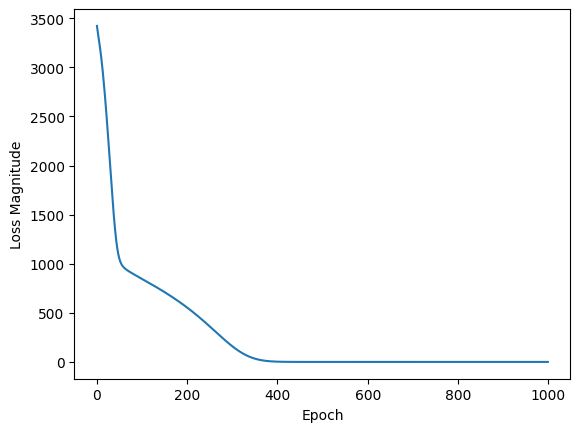

In [11]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss Magnitude')
plt.plot(history)
#plt.yscale('log')
plt.show()

From this plot it is possible to note that approximately from the epoch 300 or 400, the loss function is so small that it presents no substancial changes (i.e. from the epoch 400 the algorithm foes not learn anything more).


---

---